In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

## Load the Dataset

In [1]:
df = pd.read_csv('tvmarketing.csv')
df

NameError: name 'pd' is not defined

## Plotting the Data

In [4]:
sns.set_theme(style="white", palette=sns.color_palette("hls", 8))

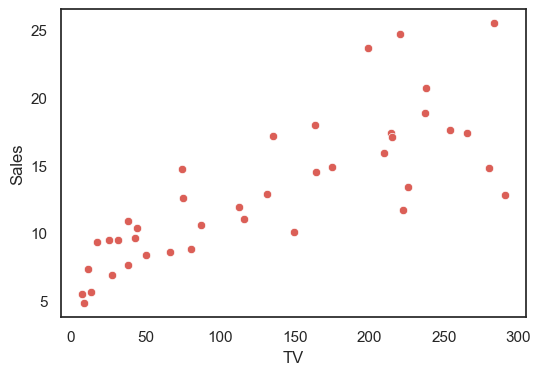

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6, 4));
sns.scatterplot(data=df, x='TV', y='Sales', ax=ax);

## Linear Regression Model

$h(x) = \theta_1 x_1 + \theta_0$

In [6]:
theta_1 = 0.045

In [7]:
theta_0 = 5

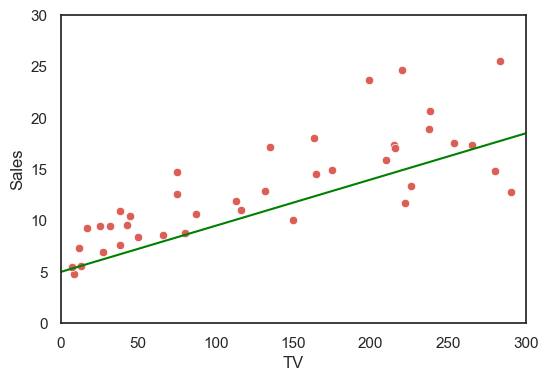

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6, 4));
sns.scatterplot(data=df, x='TV', y='Sales', ax=ax);
ax.set_ylim(0, 30);
ax.set_xlim(0, 300);

# Plot the linear regression model
x = np.linspace(0,300)
y = x * theta_1 + theta_0
sns.lineplot(x=x, y=y, ax=ax, color='green');

Interactive version:

In [9]:
def plot(theta_1, theta_0, df):
    fig, ax = plt.subplots(1,1, figsize=(6, 4));
    sns.scatterplot(data=df, x='TV', y='Sales', ax=ax);
    ax.set_ylim(0, 30);
    ax.set_xlim(0, 300);

    # Plot the linear regression model
    x = np.linspace(0,300)
    y = x * theta_1 + theta_0
    sns.lineplot(x=x, y=y, ax=ax, color='green');
    

In [10]:
widgets.interact(plot, theta_1 = widgets.FloatSlider(min=-0.5, max=0.5, step=0.001),
                       theta_0 = widgets.FloatSlider(min=0, max=50, step=0.25),
                       df=widgets.fixed(df));

## Cost Function

$\frac{1}{2n} \sum{(h(x;\theta)-y)^2}$

In [43]:
theta_1 = 0.07

In [44]:
theta_0 = 15

In [45]:
pred = df['TV'] * theta_1 + theta_0

In [46]:
cost = np.power(pred - df['Sales'], 2).sum() * 1 / (2 * len(df))
cost

69.37877556250001

Interactive version:

For this version, we restrict our `theta_0` to be 5 (i.e., line will always pass through the origin) for easier visualization.

In [14]:
def compute_error(theta_1):
    pred = df['TV'] * theta_1 + 5
    return np.power(pred - df['Sales'], 2).sum() * 1 / (2 * len(df))

In [15]:
x_cost = np.linspace(0,0.1,100)
y_cost = [compute_error(i) for i in x_cost]

In [16]:
def plot_with_cost(theta_1, df):
    fig, ax = plt.subplots(1,2, figsize=(10, 4));
    sns.scatterplot(data=df, x='TV', y='Sales', ax=ax[0]);
    ax[0].set_ylim(0, 30);
    ax[0].set_xlim(0, 300);

    # Plot the linear regression model
    x = np.linspace(0,300)
    y = x * theta_1 + 5
    sns.lineplot(x=x, y=y, ax=ax[0], color='green');

    # Plot the cost function with respect to theta_1
    sns.lineplot(x=x_cost, y=y_cost, color='purple', ax=ax[1]);
    ax[1].set_ylabel('Cost');
    ax[1].set_xlabel('Theta_1');
    point = compute_error(theta_1)
    ax[1].plot(theta_1, point, marker='x', color='green');
    ax[1].set_xlim(0,0.1);
    
widgets.interact(plot_with_cost, theta_1 = widgets.FloatSlider(min=0, max=0.1, step=0.001),
                       df=widgets.fixed(df));

interactive(children=(FloatSlider(value=0.0, description='theta_1', max=0.1, step=0.001), Output()), _dom_clas…